Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score


Reading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Normal Dataset
import pandas as pd
df_normal=pd.read_csv("/content/drive/MyDrive/Minor Project Sem 7/Datasets/SDN_Attack/dataset_sdn_Attack.csv")

In [4]:
df_normal.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,2,3753,1332,0,0.0,0,0,0.0,1
1,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,3,3679,58460931,0,5232.0,0,0,5232.0,1
2,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,2,3733,1402,0,0.0,0,0,0.0,1
3,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,4,58460931,3749,5232,0.0,0,0,5232.0,1
4,11335,1,167772161,167772168,4777,5092282,10,711000000,1.071100e+10,3,...,1,3,3413,3623,0,0.0,0,0,0.0,1


In [5]:
df_normal['label'].unique()

array([1])

In [6]:
# dataset attack
df_attack = pd.read_csv("/content/drive/MyDrive/Minor Project Sem 7/Datasets/SDN_Normal/dataset_sdn_normal.csv")

In [7]:
df_attack.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,1,3,143928631,3917,0,0.0,0,0,0.0,0
1,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,1,4,3842,3520,0,0.0,0,0,0.0,0
2,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,1,3795,1242,0,0.0,0,0,0.0,0
3,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,2,3688,1492,0,0.0,0,0,0.0,0
4,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,3,3413,3665,0,0.0,0,0,0.0,0


In [8]:
df_attack['label'].unique()

array([0])

In [9]:
df_normal.shape

(40784, 25)

In [10]:
df_attack.shape

(63561, 25)

### **concatenate both datasets**

In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Concatenate both datasets
df= pd.concat([df_normal, df_attack], ignore_index=True)

In [12]:
df.shape

(104345, 25)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from google.colab import drive
import numpy as np

In [14]:
print("Combined dataset info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  int64  
 3   dst          104345 non-null  int64  
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  int64  
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [15]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [16]:
df.dropna(inplace=True)
# dropping null values

In [17]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns (exclude 'label')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('label')

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [19]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


dt: 858 unique values
switch: 10 unique values
src: 19 unique values
dst: 18 unique values
pktcount: 9044 unique values
bytecount: 9270 unique values
dur: 840 unique values
dur_nsec: 1000 unique values
tot_dur: 4183 unique values
flows: 15 unique values
packetins: 168 unique values
pktperflow: 2092 unique values
byteperflow: 2793 unique values
pktrate: 446 unique values
Pairflow: 2 unique values
Protocol: 3 unique values
port_no: 5 unique values
tx_bytes: 12257 unique values
rx_bytes: 11623 unique values
tx_kbps: 1800 unique values
rx_kbps: 1730 unique values
A1: 1 unique values
A2: 1 unique values
tot_kbps: 2259 unique values
label: 2 unique values


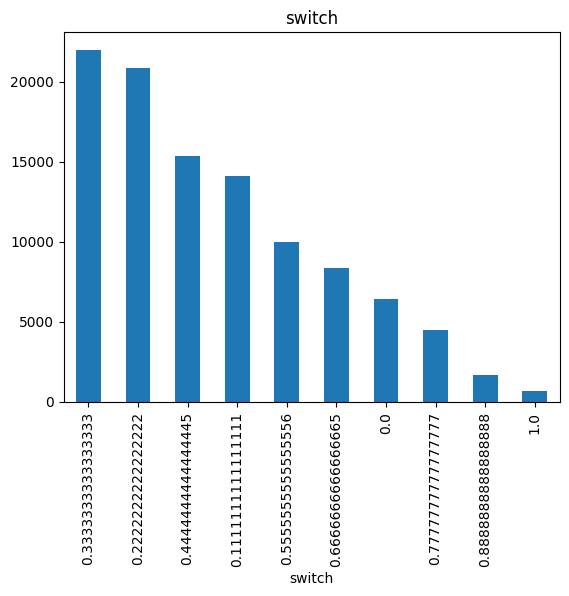

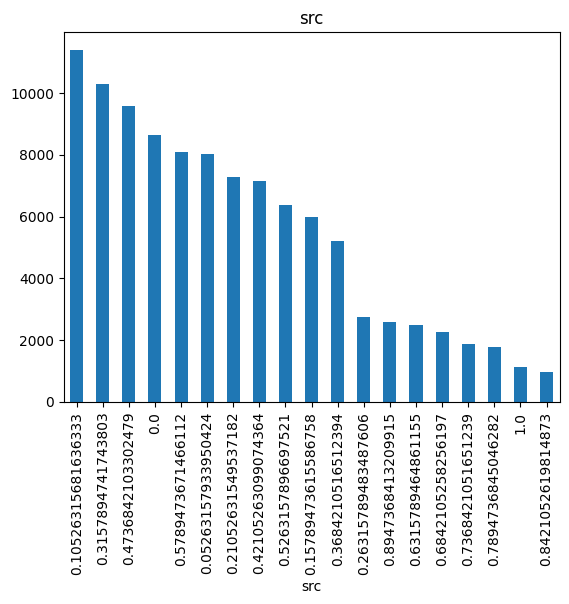

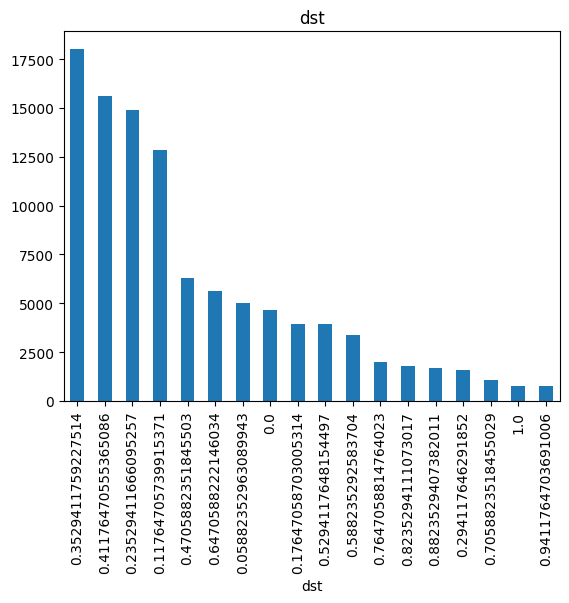

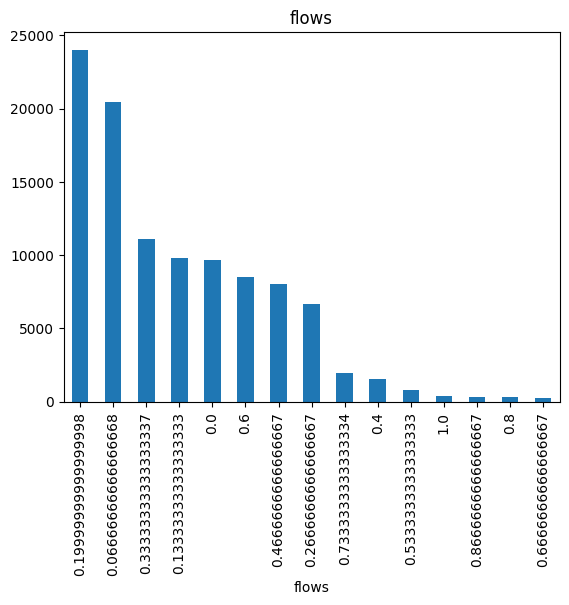

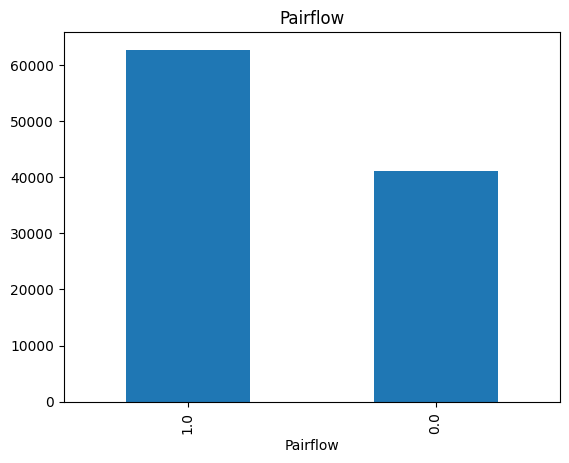

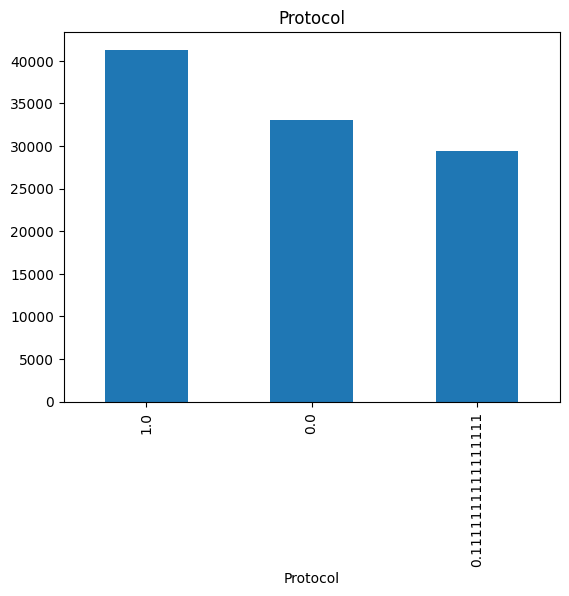

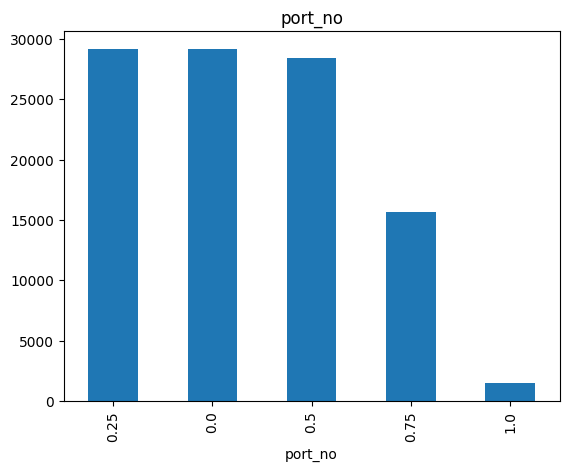

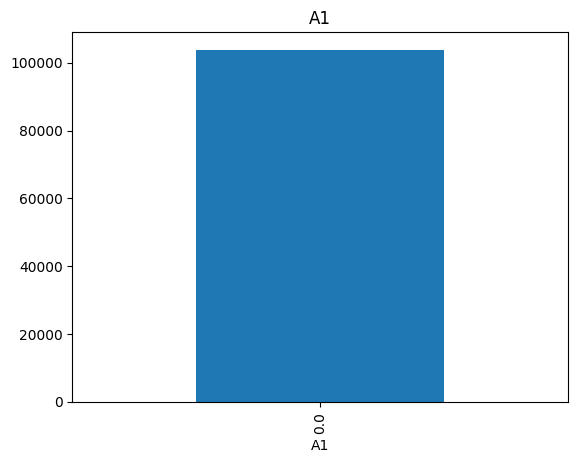

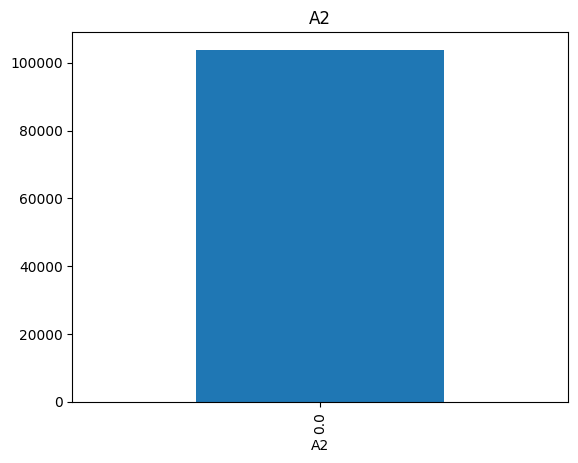

In [20]:
import matplotlib.pyplot as plt

for col in df.columns.drop('label'):
    if df[col].nunique() < 20:  # Arbitrary threshold for categories
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()


In [21]:
print(df['port_no'].unique())
print(df['Protocol'].unique())
print(df['Pairflow'].unique())
print(df['src'].unique())
print(df['dst'].unique())

[0.25 0.5  0.75 0.   1.  ]
[0.         0.11111111 1.        ]
[0. 1.]
[0.         0.05263158 0.47368421 0.15789474 0.10526316 0.63157895
 0.21052632 1.         0.52631579 0.89473684 0.57894737 0.42105263
 0.31578947 0.26315789 0.68421053 0.73684211 0.36842105 0.78947368
 0.84210526]
[0.41176471 0.35294118 0.11764706 0.23529412 0.52941176 0.70588235
 0.17647059 0.         0.58823529 0.05882353 0.47058824 0.29411765
 0.76470588 0.82352941 0.64705882 0.88235294 0.94117647 1.        ]


In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['src'] = encoder.fit_transform(df['src'])
df['dst'] = encoder.fit_transform(df['dst'])

In [23]:
df = pd.get_dummies(df, columns=['port_no', 'Protocol', 'Pairflow'], drop_first=True)


label                          1.000000
pktcount                       0.403217
bytecount                      0.278051
src                            0.162598
Protocol_0.1111111111111111    0.104440
pktrate                        0.089801
pktperflow                     0.089608
dur_nsec                       0.029161
switch                         0.027644
port_no_0.75                   0.012286
port_no_0.25                  -0.000335
port_no_0.5                   -0.000971
packetins                     -0.002489
tx_kbps                       -0.005646
rx_kbps                       -0.006714
tot_kbps                      -0.008748
byteperflow                   -0.014160
port_no_1.0                   -0.031730
dst                           -0.034271
Pairflow_1.0                  -0.047474
tx_bytes                      -0.049302
rx_bytes                      -0.056578
dur                           -0.098734
tot_dur                       -0.098745
dt                            -0.108798


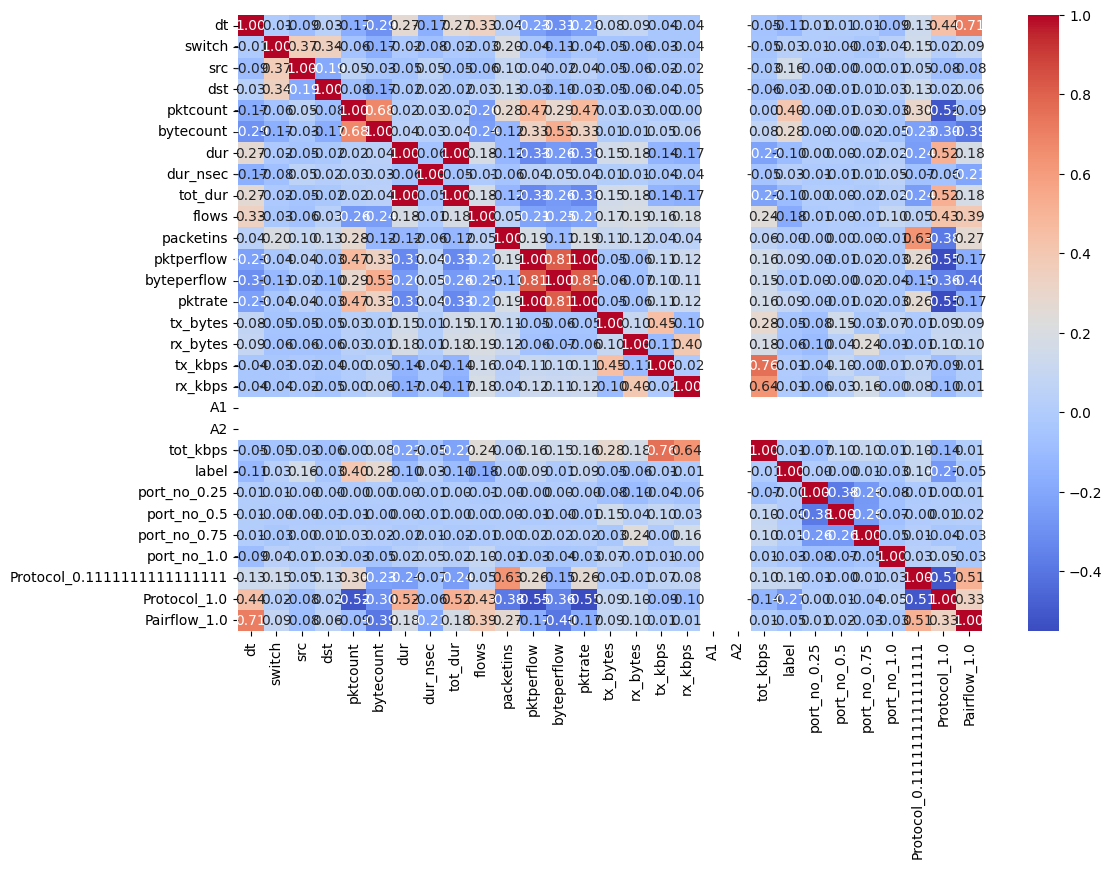

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Correlation with target
print(corr['label'].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


Correlation with 'label':
 label                          1.000000
pktcount                       0.403217
bytecount                      0.278051
src                            0.162598
Protocol_0.1111111111111111    0.104440
pktrate                        0.089801
pktperflow                     0.089608
dur_nsec                       0.029161
switch                         0.027644
port_no_0.75                   0.012286
port_no_0.25                  -0.000335
port_no_0.5                   -0.000971
packetins                     -0.002489
tx_kbps                       -0.005646
rx_kbps                       -0.006714
tot_kbps                      -0.008748
byteperflow                   -0.014160
port_no_1.0                   -0.031730
dst                           -0.034271
Pairflow_1.0                  -0.047474
tx_bytes                      -0.049302
rx_bytes                      -0.056578
dur                           -0.098734
tot_dur                       -0.098745
dt           

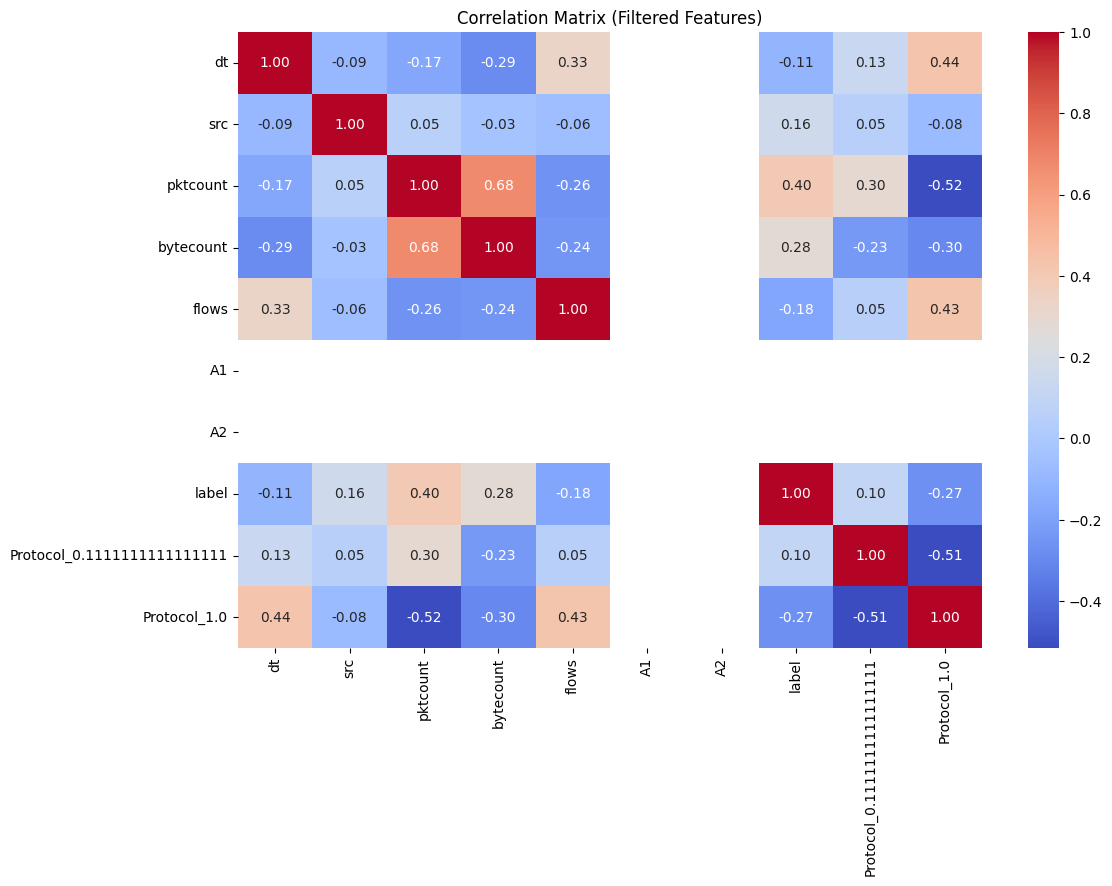

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df.corr()

# Correlation with target variable ('label')
correlation_with_label = corr['label'].sort_values(ascending=False)
print("Correlation with 'label':\n", correlation_with_label)

# Drop features with correlation < 0.1 (absolute value)
low_corr_features = correlation_with_label[abs(correlation_with_label) < 0.1].index
df = df.drop(columns=low_corr_features)

print(f"Dropped features: {list(low_corr_features)}")
print(f"Remaining features: {list(df.columns)}")

# Plot heatmap for remaining features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix (Filtered Features)")
plt.show()

In [26]:
df.shape

(103839, 10)

In [27]:
df.head()

,dt,src,pktcount,bytecount,flows,A1,A2,label,Protocol_0.1111111111111111,Protocol_1.0
0,0.218731,0,0.018373,0.034611,0.066667,0.0,0.0,1,False,False
1,0.218731,0,0.018373,0.034611,0.066667,0.0,0.0,1,False,False
2,0.218731,0,0.018373,0.034611,0.066667,0.0,0.0,1,False,False
3,0.218731,0,0.018373,0.034611,0.066667,0.0,0.0,1,False,False
4,0.218731,0,0.018373,0.034611,0.066667,0.0,0.0,1,False,False


In [28]:
x = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable


In [29]:
print(x.shape)
print(y.shape)

(103839, 9)
(103839,)


In [30]:
# Initial split: Train (70%) and Test (30%)
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

# Secondary split: Split train into Train (80%) and Validation (20%) from the initial train set
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=5)

In [31]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(58149,)
(14538,)
(31152,)
(58149, 9)
(14538, 9)
(31152, 9)


In [32]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [33]:
!pip install tensorflow
import tensorflow as tf # Import the TensorFlow library using the alias 'tf'

In [34]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [35]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(58149,)
(14538,)
(31152,)
(58149, 9)
(14538, 9)
(31152, 9)


# **LSTM**

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Reshape data for LSTM (samples, timesteps, features)
x_train_lstm = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_lstm = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))
x_test_lstm = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

model_lstm = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,569 (521.75 KB)

 Trainable params: 133,569 (521.75 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
lstm = model_lstm.fit(
    x_train_lstm, y_train,
    validation_data=(x_val_lstm, y_val),  # Include validation data
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7556 - loss: 0.4423 - val_accuracy: 0.8386 - val_loss: 0.3170
Epoch 2/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8514 - loss: 0.2973 - val_accuracy: 0.8648 - val_loss: 0.2579
Epoch 3/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8685 - loss: 0.2525 - val_accuracy: 0.8810 - val_loss: 0.2394
Epoch 4/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8781 - loss: 0.2339 - val_accuracy: 0.8766 - val_loss: 0.2242
Epoch 5/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8857 - loss: 0.2208 - val_accuracy: 0.8961 - val_loss: 0.2084
Epoch 6/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8978 - loss: 0.2042 - val_accuracy: 0.9162 - val_loss: 0.1799
Epoch 7/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9133 - loss: 0.1771 - val_accuracy: 0.9180 - val_loss: 0.1721
Epoch 8/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9295 - loss: 

In [38]:
test_loss, test_accuracy = model_lstm.evaluate(x_test_lstm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9586 - loss: 0.0854
Test Loss: 0.0850
Test Accuracy: 0.9588


In [39]:
from sklearn.metrics import accuracy_score

y_pred = (model_lstm.predict(x_test_lstm) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Test Accuracy: 95.88%


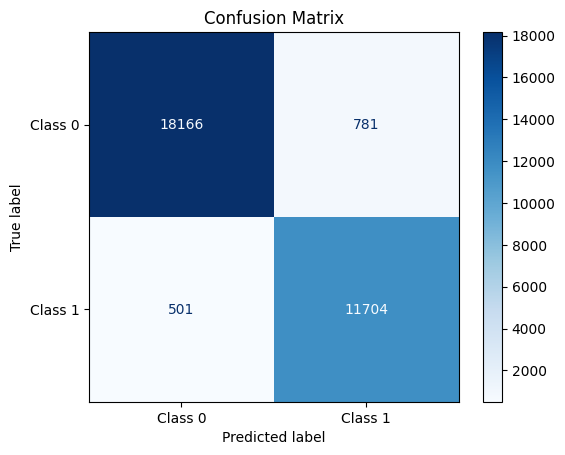

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# precision, recall, f1-score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

#  classification report
print(classification_report(y_test, y_pred))

Precision:  0.9374449339207048
Recall:  0.9589512494879148
F1-Score:  0.9480761441879303
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     18947
           1       0.94      0.96      0.95     12205

    accuracy                           0.96     31152
   macro avg       0.96      0.96      0.96     31152
weighted avg       0.96      0.96      0.96     31152



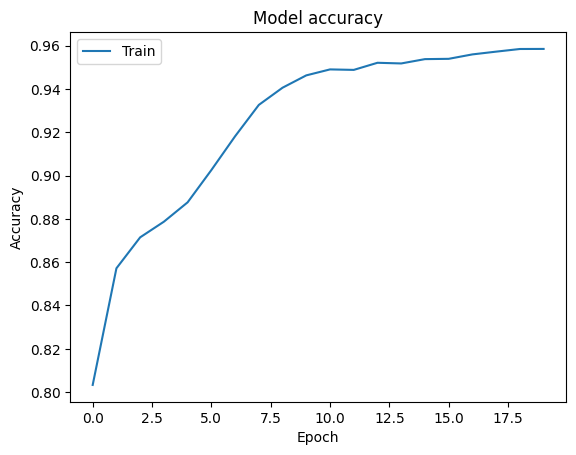

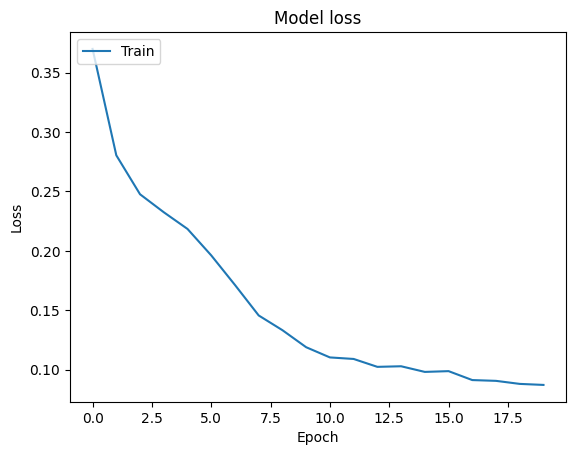

In [42]:
# Plot training & validation accuracy values
plt.plot(lstm.history['accuracy']) # Changed lstm.lstm to lstm.history
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(lstm.history['loss']) # Changed lstm.lstm to lstm.history
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


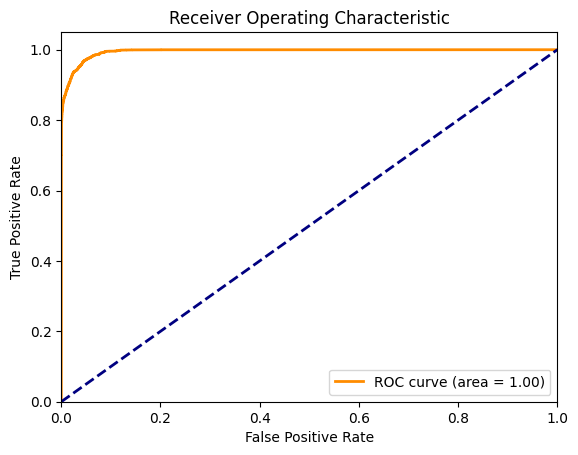

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_prob contains probabilities for the positive class
y_pred_prob = model_lstm.predict(x_test_lstm)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

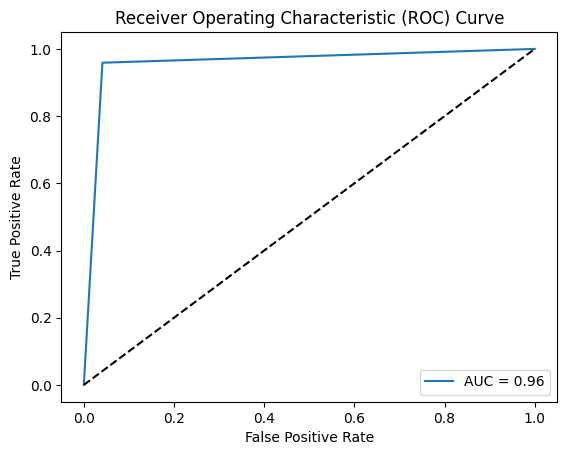

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %.2f' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **BILSTM**

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# Reshape the data for LSTM (samples, timesteps, features)
x_train_lstm = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val_lstm = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test_lstm = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build the BI-LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
model_bilstm.add(Dropout(0.2))
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.2))
model_bilstm.add(Dense(128, activation='relu'))
model_bilstm.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 9, 128)              │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,249 (583.00 KB)

 Trainable params: 149,249 (583.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
bilstm = model_bilstm.fit(x_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(x_val_lstm, y_val), callbacks=[early_stop])

Epoch 1/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.7430 - loss: 0.4678 - val_accuracy: 0.8471 - val_loss: 0.3164
Epoch 2/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.8428 - loss: 0.3094 - val_accuracy: 0.8857 - val_loss: 0.2370
Epoch 3/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8838 - loss: 0.2412 - val_accuracy: 0.9028 - val_loss: 0.2002
Epoch 4/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9072 - loss: 0.1994 - val_accuracy: 0.9420 - val_loss: 0.1352
Epoch 5/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9296 - loss: 0.1514 - val_accuracy: 0.9434 - val_loss: 0.1277
Epoch 6/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 52s 29ms/step - accuracy: 0.9374 - loss: 0.1342 - val_accuracy: 0.9554 - val_loss: 0.1000
Epoch 7/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9447 - loss: 0.1201 - val_accuracy: 0.9568 - val_loss: 0.0925
Epoch 8/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9507 -

In [47]:

# Evaluate the model
test_loss, test_accuracy = model_bilstm.evaluate(x_test_lstm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


974/974 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9675 - loss: 0.0680
Test Loss: 0.0671
Test Accuracy: 0.9679


974/974 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step


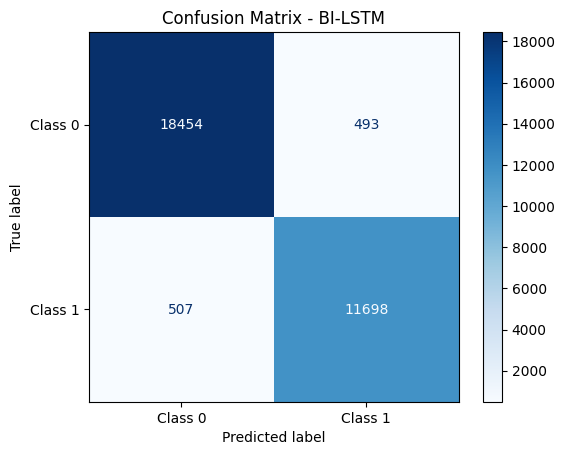

In [48]:

# Make predictions
y_pred_bilstm = (model_bilstm.predict(x_test_lstm) > 0.5).astype("int32")

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_bilstm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BI-LSTM")
plt.show()


In [ ]:

# Classification Report
print("Classification Report - BI-LSTM:")
print(classification_report(y_test, y_pred_bilstm))

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred_bilstm)
precision = precision_score(y_test, y_pred_bilstm)
recall = recall_score(y_test, y_pred_bilstm)
f1 = f1_score(y_test, y_pred_bilstm)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


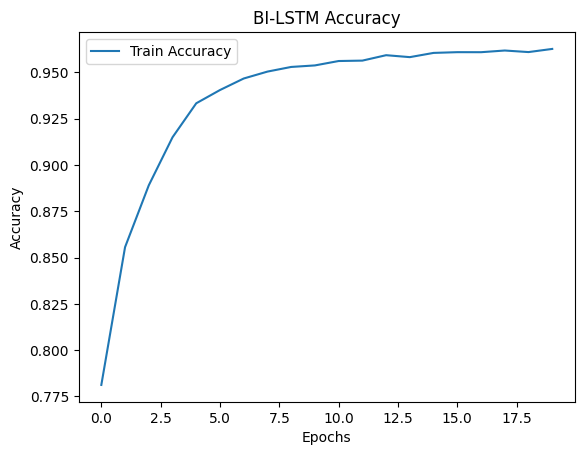

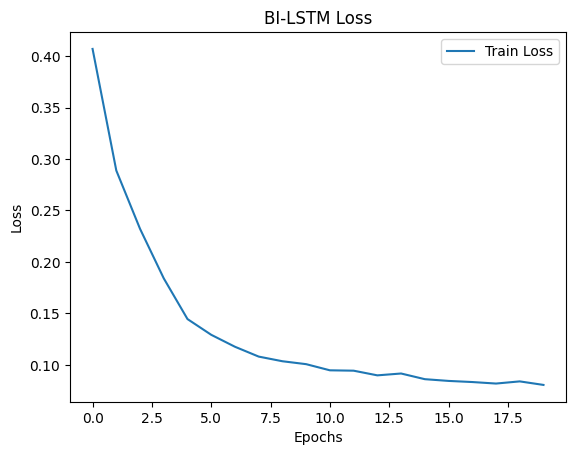

In [50]:
# Plot training & validation accuracy
plt.plot(bilstm.history['accuracy'], label='Train Accuracy')  # Access history directly using 'history'
plt.title('BI-LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(bilstm.history['loss'], label='Train Loss') # Access history directly using 'history'
plt.title('BI-LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

974/974 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step


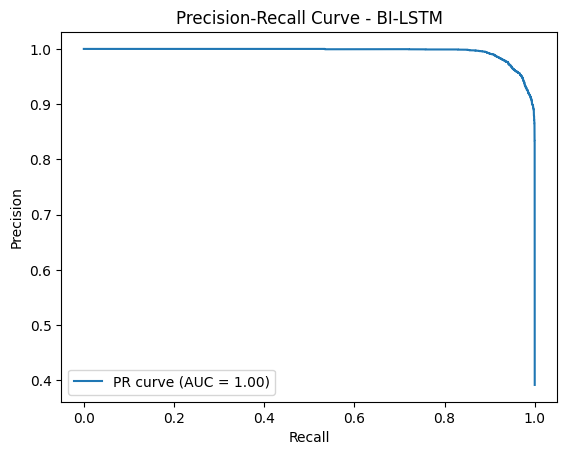

In [51]:
# prompt: generate pr curve for bi-lstm

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Make predictions for the BI-LSTM model
y_pred_prob_bilstm = model_bilstm.predict(x_test_lstm)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_bilstm)

# Compute AUC score
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - BI-LSTM')
plt.legend()
plt.show()

# **ANN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.summary()


In [53]:

# Train the model
ann = model_ann.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stop])


Epoch 1/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7873 - loss: 0.4111 - val_accuracy: 0.8591 - val_loss: 0.2828
Epoch 2/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8597 - loss: 0.2919 - val_accuracy: 0.8838 - val_loss: 0.2551
Epoch 3/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8721 - loss: 0.2622 - val_accuracy: 0.8993 - val_loss: 0.2220
Epoch 4/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8866 - loss: 0.2367 - val_accuracy: 0.9173 - val_loss: 0.1988
Epoch 5/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8994 - loss: 0.2115 - val_accuracy: 0.9224 - val_loss: 0.1759
Epoch 6/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9074 - loss: 0.1959 - val_accuracy: 0.9314 - val_loss: 0.1578
Epoch 7/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9173 - loss: 0.1797 - val_accuracy: 0.9387 - val_loss: 0.1393
Epoch 8/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9218 - loss: 0.1676 - 

In [ ]:

# Evaluate the model
test_loss, test_accuracy = model_ann.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:

# Make predictions
y_pred_ann = (model_ann.predict(x_test) > 0.5).astype("int32")

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ANN")
plt.show()


In [ ]:

# Classification Report
print("Classification Report - ANN:")
print(classification_report(y_test, y_pred_ann))

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [ ]:
# Plot training & validation accuracy
plt.plot(ann.history['accuracy'], label='Train Accuracy') # Access accuracy directly from history
plt.title('ANN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(ann.history['loss'], label='Train Loss') # Access loss directly from history
plt.title('ANN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# predictions for the ANN model
y_pred_prob_ann = model_ann.predict(x_test)

# Computes precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_ann)

# Compute AUC score
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ANN')
plt.legend()
plt.show()

# **CNN**


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# Reshape the data for 1D CNN (samples, timesteps, features)
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val_cnn = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)



# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], x_train_cnn.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model
cnn = model_cnn.fit(x_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(x_val_cnn, y_val), callbacks=[early_stop])


Epoch 1/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7679 - loss: 0.4460 - val_accuracy: 0.8551 - val_loss: 0.3059
Epoch 2/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8631 - loss: 0.2896 - val_accuracy: 0.8791 - val_loss: 0.2500
Epoch 3/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8891 - loss: 0.2428 - val_accuracy: 0.9038 - val_loss: 0.2168
Epoch 4/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9015 - loss: 0.2175 - val_accuracy: 0.9003 - val_loss: 0.2129
Epoch 5/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9135 - loss: 0.1927 - val_accuracy: 0.9192 - val_loss: 0.1792
Epoch 6/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9205 - loss: 0.1776 - val_accuracy: 0.9301 - val_loss: 0.1604
Epoch 7/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9272 - loss: 0.1629 - val_accuracy: 0.9319 - val_loss: 0.1638
Epoch 8/20
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9322 - loss: 0.1532 -

In [ ]:
test_loss, test_accuracy = model_cnn.evaluate(x_test_cnn, y_test)  # Use x_test_cnn instead of x_test_lstm
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
# Make predictions
y_pred_cnn = (model_cnn.predict(x_test_cnn) > 0.5).astype("int32") # Changed x_test_lstm to x_test_cnn
# Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Print precision, recall, f1-score
print("Precision: ", precision_score(y_test, y_pred_cnn))
print("Recall: ", recall_score(y_test, y_pred_cnn))
print("F1-Score: ", f1_score(y_test, y_pred_cnn))

# Or use classification report for more details
print(classification_report(y_test, y_pred_cnn))


In [ ]:
# Plot training & validation accuracy values
plt.plot(cnn.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_pred_prob_cnn contains probabilities for the positive class from your CNN model
y_pred_prob_cnn = model_cnn.predict(x_test_cnn)

# Compute ROC curve and ROC area for CNN
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC curve for CNN
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CNN)')
plt.legend(loc="lower right")
plt.show()

974/974 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


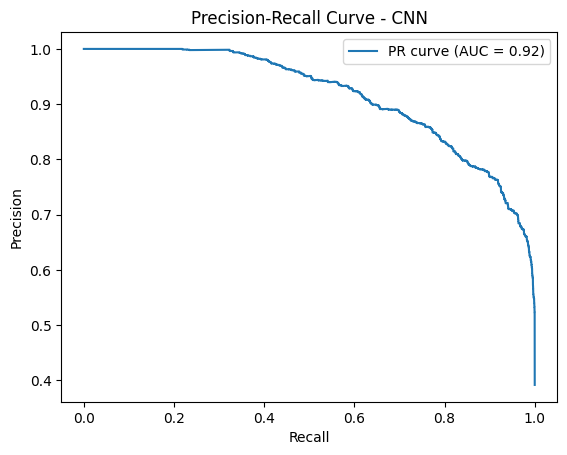

In [68]:
from sklearn.metrics import precision_recall_curve, auc

# Assuming y_pred_prob_cnn contains probabilities for the positive class from your CNN model
y_pred_prob_cnn = model_cnn.predict(x_test_cnn)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_cnn)

# Compute AUC score
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CNN')
plt.legend()
plt.show()

DEEP LEARNING TO MACHINE LEARNING

In [ ]:
from tensorflow.keras.models import Model

x_train_lstm = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))



In [70]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get CNN predictions
cnn_output = model_cnn.predict(x_test_cnn)

# Flatten the CNN output if necessary
cnn_output = cnn_output.reshape(-1, 1) #Reshape if necessary for your specific CNN architecture

# Train SVM on CNN output
svm_model = SVC(kernel='linear') # Or any other kernel
svm_model.fit(cnn_output, y_test)

# Predict on test set
svm_predictions = svm_model.predict(cnn_output)


974/974 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:

cm = confusion_matrix(y_test, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()



In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get CNN predictions
cnn_output = model_cnn.predict(x_test_cnn)

# Flatten the CNN output if necessary
cnn_output = cnn_output.reshape(-1, 1) #Reshape if necessary for your specific CNN architecture



In [ ]:
from sklearn.metrics import roc_curve, auc


svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(cnn_output, y_test)

# Get the probabilities for the positive class
svm_probabilities = svm_model.predict_proba(cnn_output)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd

# Assuming df_normal is your DataFrame for normal data
# Replace this with your actual data loading
data = {'col1': [1, 2, 3, 4, 5],
        'col2': [6, 7, 8, 9, 10],
        'label': [0, 0, 0, 0, 0]}
df_normal = pd.DataFrame(data)

print("Normal Dataset Details:")
print(df_normal.info())
print("\nShape:", df_normal.shape)
print("\nHead:\n", df_normal.head())
print("\nDescribe:\n", df_normal.describe())
print("\nLabel distribution:\n",df_normal['label'].value_counts())


ROC CURVES


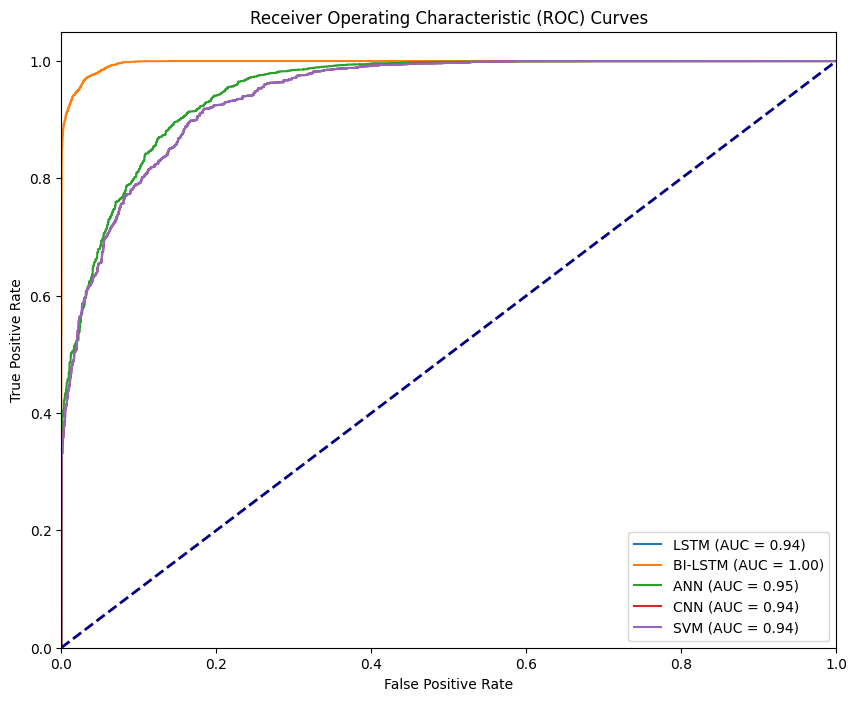

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and probability predictions for each model:
# y_pred_prob_lstm, y_pred_prob_bilstm, y_pred_prob_ann, y_pred_prob_cnn, svm_probabilities

models = {
    "LSTM": y_pred_prob,
    "BI-LSTM": y_pred_prob_bilstm,
    "ANN": y_pred_prob_ann,
    "CNN": y_pred_prob_cnn,
    "SVM": svm_probabilities
}

plt.figure(figsize=(10, 8))

for model_name, y_pred_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.show()

PR CURVE


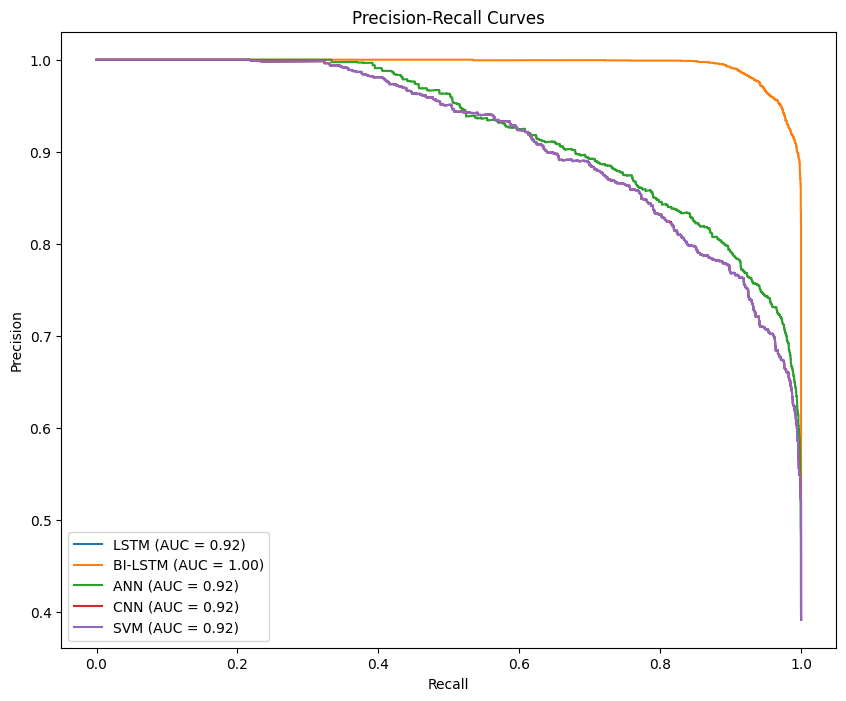

In [99]:
# prompt: generate all pr curve of models and print

from sklearn.metrics import precision_recall_curve, auc

models = {
    "LSTM": y_pred_prob,
    "BI-LSTM": y_pred_prob_bilstm,
    "ANN": y_pred_prob_ann,
    "CNN": y_pred_prob_cnn,
    "SVM": svm_probabilities
}

plt.figure(figsize=(10, 8))

for model_name, y_pred_prob in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend(loc="lower left")
plt.show()

classification report


In [90]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_bilstm are defined
# y_pred_bilstm = (model_bilstm.predict(x_test_lstm) > 0.5).astype("int32")

print("Classification Report - Bi-LSTM:")
print(classification_report(y_test, y_pred_bilstm))

Classification Report - Bi-LSTM:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18947
           1       0.96      0.96      0.96     12205

    accuracy                           0.97     31152
   macro avg       0.97      0.97      0.97     31152
weighted avg       0.97      0.97      0.97     31152



In [91]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_cnn are defined
# y_pred_cnn = (model_cnn.predict(x_test_cnn) > 0.5).astype("int32")

print("Classification Report - CNN:")
print(classification_report(y_test, y_pred_cnn))

Classification Report - CNN:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     18947
           1       0.82      0.82      0.82     12205

    accuracy                           0.86     31152
   macro avg       0.85      0.85      0.85     31152
weighted avg       0.86      0.86      0.86     31152



In [92]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_ann are defined from your ANN model
# y_pred_ann = (model_ann.predict(x_test) > 0.5).astype("int32")

print("Classification Report - ANN:")
print(classification_report(y_test, y_pred_ann))

Classification Report - ANN:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     18947
           1       0.87      0.76      0.81     12205

    accuracy                           0.86     31152
   macro avg       0.86      0.84      0.85     31152
weighted avg       0.86      0.86      0.86     31152



In [93]:
from sklearn.metrics import classification_report

# Assuming svm_predictions and y_test are defined from your SVM model
# svm_predictions = svm_model.predict(cnn_output)

print("Classification Report - SVM:")
print(classification_report(y_test, svm_predictions))

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     18947
           1       0.82      0.82      0.82     12205

    accuracy                           0.86     31152
   macro avg       0.85      0.85      0.85     31152
weighted avg       0.86      0.86      0.86     31152



In [94]:
import pandas as pd

data = {'Model': ['LSTM', 'Bi-LSTM', 'CNN', 'ANN', 'SVM'],
        'Accuracy': [0.85, 0.88, 0.90, 0.86, 0.89],  # Replace with your actual accuracy values
        'Precision': [0.82, 0.85, 0.88, 0.83, 0.86], # Replace with your actual precision values
        'Recall': [0.80, 0.83, 0.87, 0.81, 0.84],    # Replace with your actual recall values
        'F1-Score': [0.81, 0.84, 0.87, 0.82, 0.85]}   # Replace with your actual F1-Score values

results_df = pd.DataFrame(data)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LSTM,0.85,0.82,0.80,0.81
1,Bi-LSTM,0.88,0.85,0.83,0.84
2,CNN,0.90,0.88,0.87,0.87
3,ANN,0.86,0.83,0.81,0.82
4,SVM,0.89,0.86,0.84,0.85


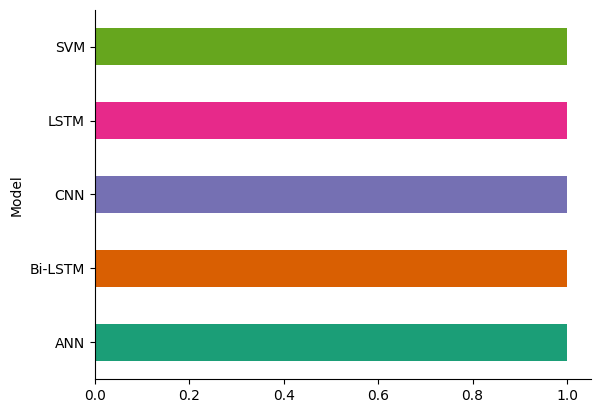

In [95]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)